In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cấu hình
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = (10, 8)

print("📂 Đang tải dữ liệu...")
df_events = pd.read_csv('../data/udk_moodle_log.csv')
print(f"✅ Đã tải {len(df_events):,} events")

📂 Đang tải dữ liệu...
✅ Đã tải 1,259,411 events


In [2]:
# Phân loại events
def classify_event(event_name):
    event_lower = str(event_name).lower()
    
    # System events
    system_keywords = ['webservice', 'token', 'loggedin', 'loggedout', 'notification']
    if any(keyword in event_lower for keyword in system_keywords):
        return 'System Event'
    
    # User learning events
    learning_keywords = ['viewed', 'submitted', 'started', 'created', 'attempt', 'quiz', 'assignment', 'forum']
    if any(keyword in event_lower for keyword in learning_keywords):
        return 'User Learning Event'
    
    return 'Other'

df_events['event_category'] = df_events['eventname'].apply(classify_event)
category_counts = df_events['event_category'].value_counts()

print("\n📊 Phân loại Events:")
for cat, count in category_counts.items():
    pct = (count / len(df_events)) * 100
    print(f"   {cat}: {count:,} ({pct:.1f}%)")


📊 Phân loại Events:
   User Learning Event: 803,770 (63.8%)
   System Event: 373,173 (29.6%)
   Other: 82,468 (6.5%)



💾 Đang lưu biểu đồ...
✅ Đã lưu: challenge_1a_system_noise_ratio.png
✅ Đã lưu: challenge_1a_system_noise_ratio.pdf


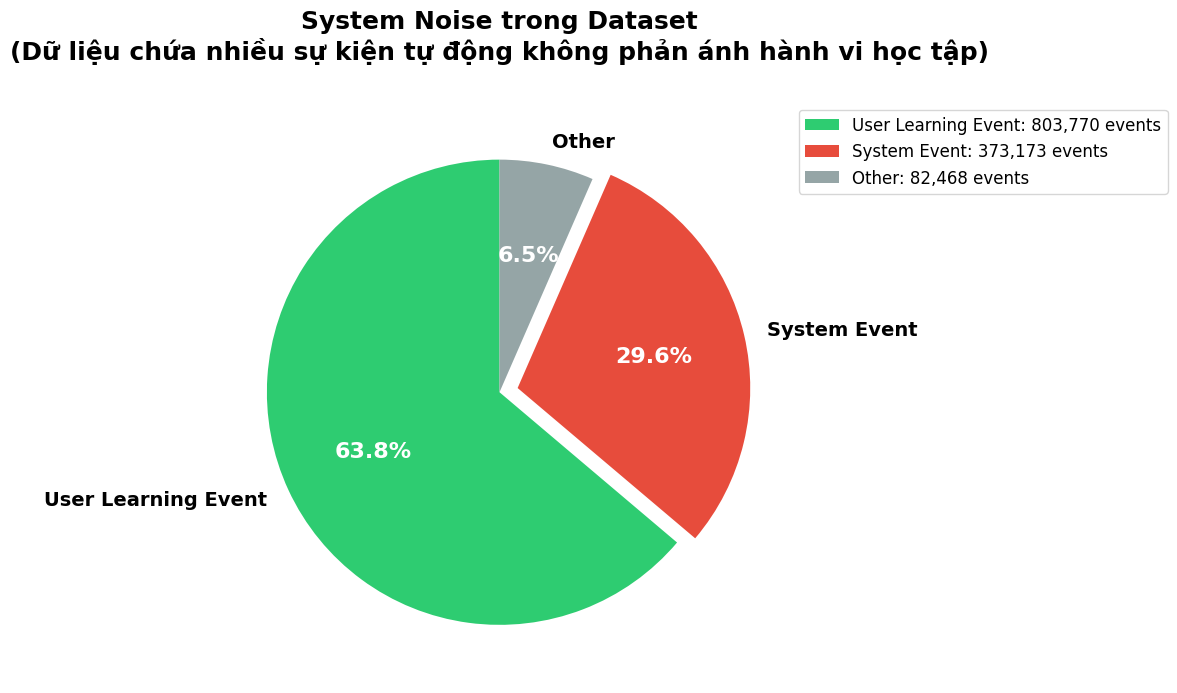


🎉 HOÀN THÀNH!


In [3]:
# Tạo biểu đồ Pie Chart
fig, ax = plt.subplots(figsize=(10, 8))

colors = {
    'System Event': '#e74c3c',        # Đỏ - noise
    'User Learning Event': '#2ecc71', # Xanh - useful
    'Other': '#95a5a6'                # Xám - unknown
}

wedges, texts, autotexts = ax.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    colors=[colors[cat] for cat in category_counts.index],
    startangle=90,
    explode=[0.08 if cat == 'System Event' else 0 for cat in category_counts.index],
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(16)

ax.set_title('System Noise trong Dataset\n(Dữ liệu chứa nhiều sự kiện tự động không phản ánh hành vi học tập)', 
             fontsize=18, fontweight='bold', pad=30)

# Thêm legend với số lượng cụ thể
legend_labels = [f'{cat}: {count:,} events' for cat, count in zip(category_counts.index, category_counts.values)]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()

# Lưu file
print("\n💾 Đang lưu biểu đồ...")
plt.savefig('challenge_1a_system_noise_ratio.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_1a_system_noise_ratio.png")

plt.savefig('challenge_1a_system_noise_ratio.pdf', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_1a_system_noise_ratio.pdf")

plt.show()

print("\n🎉 HOÀN THÀNH!")